In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from tensorflow import keras
from datetime import datetime

In [3]:
m = 2
xs = [i * m for i in range(50)]
c = 50

In [4]:
ms = [m for _ in range(50)]
cs = [c for _ in range(50)]

In [5]:
ys = [m * x + c for x in xs]

In [6]:
data = {
    'ms': ms,
    'xs': xs,
    'cs': cs,
    'ys': ys
}

df = pd.DataFrame(data=data)
df.head(5)

,ms,xs,cs,ys
0,2,0,50,50
1,2,2,50,54
2,2,4,50,58
3,2,6,50,62
4,2,8,50,66


In [7]:
X_train = df[['ms', 'xs', 'cs']]
y_train = df['ys']

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=3, input_shape=[3]))
model.add(tf.keras.layers.Dense(units=3, input_shape=[3]))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [11]:
epochs_hist = model.fit(X_train, y_train, epochs=500, callbacks=[tensorboard_callback])

Epoch 1/500
2/2 [==============================] - 0s 25ms/step - loss: 25468.3301
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 29055.0137
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 6791.9043
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 8926.3887
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 9098.1592
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 2035.2787
Epoch 7/500
2/2 [==============================] - 0s 25ms/step - loss: 3575.2036
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 1243.8728
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 4358.8516
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 622.7000
Epoch 11/500
2/2 [==============================] - 0s 8ms/step - loss: 2683.3787
Epoch 12/500
2/2 [==============================] - 0s 8ms/step - loss: 698.7065
Epoch 13/500
2/2 [=====

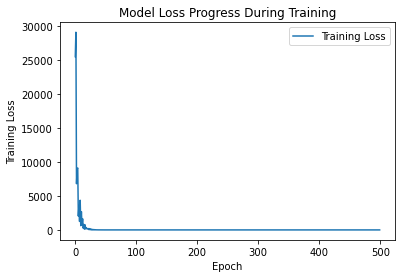

In [12]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss']);

In [13]:
model.get_weights()

[array([[ 0.94805837,  0.3764977 ,  2.198332  ],
        [ 0.7927665 , -0.437023  ,  1.520673  ],
        [ 0.13905266, -0.3679833 ,  0.72034526]], dtype=float32),
 array([ 0.8322049 , -0.06806057,  1.568137  ], dtype=float32),
 array([[-0.25874105,  0.28671035,  1.3802174 ],
        [ 3.0911844 , -2.1563053 , -0.00569913],
        [ 1.1103979 , -1.0084872 ,  0.8649666 ]], dtype=float32),
 array([-0.69048554,  2.6187959 ,  2.8049033 ], dtype=float32),
 array([[-0.07469584],
        [ 0.07921804],
        [ 0.8452395 ]], dtype=float32),
 array([4.6105814], dtype=float32)]

In [14]:
for var in model.trainable_variables:
    print(var)

<tf.Variable 'dense/kernel:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.94805837,  0.3764977 ,  2.198332  ],
       [ 0.7927665 , -0.437023  ,  1.520673  ],
       [ 0.13905266, -0.3679833 ,  0.72034526]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.8322049 , -0.06806057,  1.568137  ], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.25874105,  0.28671035,  1.3802174 ],
       [ 3.0911844 , -2.1563053 , -0.00569913],
       [ 1.1103979 , -1.0084872 ,  0.8649666 ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(3,) dtype=float32, numpy=array([-0.69048554,  2.6187959 ,  2.8049033 ], dtype=float32)>
<tf.Variable 'dense_2/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.07469584],
       [ 0.07921804],
       [ 0.8452395 ]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([4.6105814], dtype=float32)>


In [15]:
model.predict(X_train.head(5))

1/1 [==============================] - 0s 43ms/step


array([[49.999996],
       [53.999996],
       [57.999996],
       [61.999992],
       [66.      ]], dtype=float32)

In [16]:
weights = list(model.layers[0].get_weights()[0])
biases = list(model.layers[0].bias.numpy())
print(weights)
print(biases)

[array([0.94805837, 0.3764977 , 2.198332  ], dtype=float32), array([ 0.7927665, -0.437023 ,  1.520673 ], dtype=float32), array([ 0.13905266, -0.3679833 ,  0.72034526], dtype=float32)]
[0.8322049, -0.06806057, 1.568137]


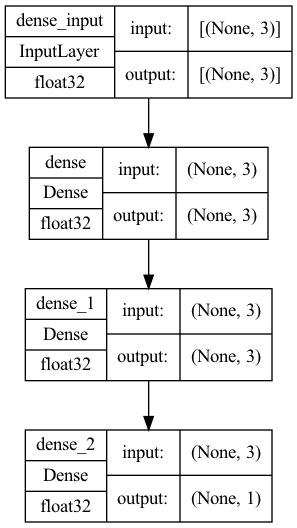

In [17]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [70]:
for i in range(len(model.layers)):
    weights = list(model.layers[i].get_weights()[0])
    biases = list(model.layers[i].bias.numpy())
    for j in range(len(biases)):
        G.add_nodes_from([
            (f"hidden layer {i} bias {j+1}", {"color": "gray", "size": 2000})
        ])

In [84]:
weights = [model.layers[i].get_weights()[0] for i in range(len(model.layers))]
biases = [model.layers[i].bias.numpy() for i in range(len(model.layers))]
inputs = [0, 0, 0]
weights = [inputs] + weights
biases = [inputs] + biases

In [85]:
import networkx as nx
G = nx.DiGraph()

for i in range(len(weights)):
    if i == 0:
        inputs = [
            ("input 1", {"color": "yellow", "size": 2000}),
            ("input 2", {"color": "yellow", "size": 2000}),
            ("input 3", {"color": "yellow", "size": 2000})
        ]
        G.add_nodes_from(inputs)
    if i > 0:
        for j in range(len(biases)):
            if j > 0:
                G.add_nodes_from([
                    (f"hidden layer {i} bias {j+1}", {"color": "gray", "size": 2000})
                ])
                for k in range(len(weights[j])):
                    

        

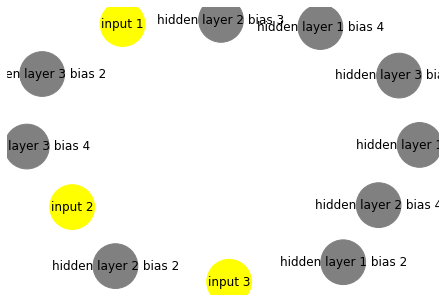

In [86]:
node_colors = nx.get_node_attributes(G, "color").values()
colors = list(node_colors)
node_sizes = nx.get_node_attributes(G, "size").values()
sizes = list(node_sizes)
nx.draw(G, with_labels=True, node_color=colors, node_size=sizes)

In [87]:
weights = [["a", "b", "c"],["d", "e", "f"],["g", "h", "i"]]
biases = [[1, 2, 3], [4, 5, 6]]



In [125]:
import networkx as nx
G = nx.DiGraph()

for i in range(len(biases)):
    G.add_nodes_from(biases[i])
    if i == 0:
        continue
    if i > 0:
        for j in range(len(biases[i])):
            print(biases[i][j])
            for k in range(len(biases[i - 1])):
                print(biases[i - 1][k])
                G.add_edges_from([(biases[i - 1][j], biases[i][k], {"_weight": weights[k][j]})])

[1, 2, 3]
[4, 5, 6]
4
1
2
3
5
1
2
3
6
1
2
3


{(1, 4): Text(-0.20597513844804216, 0.2796769571270376, 'a'),
 (1, 5): Text(0.526163218358341, -0.030493274629035082, 'd'),
 (1, 6): Text(-0.2916411712457366, -0.2581460406192489, 'g'),
 (2, 4): Text(-0.21770438525692998, 0.2951103457823925, 'b'),
 (2, 5): Text(0.5144339715494533, -0.015059885973680166, 'e'),
 (2, 6): Text(-0.3033704180546244, -0.242712651963894, 'h'),
 (3, 4): Text(-0.22279280030371662, 0.27320592659292886, 'c'),
 (3, 5): Text(0.5093455565026666, -0.03696430516314382, 'f'),
 (3, 6): Text(-0.30845883310141103, -0.26461707115335764, 'i')}

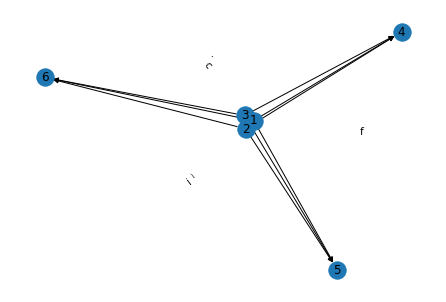

In [126]:
labels = nx.get_edge_attributes(G,'_weight')
pos=nx.spring_layout(G)
nx.draw(G, with_labels=True)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

In [129]:
weights = [model.layers[i].get_weights()[0] for i in range(len(model.layers))]
biases = [model.layers[i].bias.numpy() for i in range(len(model.layers))]
inputs = [0, 0, 0]
weights = [inputs] + weights
biases = [inputs] + biases
print(weights)
print(biases)

[[0, 0, 0], array([[ 0.94805837,  0.3764977 ,  2.198332  ],
       [ 0.7927665 , -0.437023  ,  1.520673  ],
       [ 0.13905266, -0.3679833 ,  0.72034526]], dtype=float32), array([[-0.25874105,  0.28671035,  1.3802174 ],
       [ 3.0911844 , -2.1563053 , -0.00569913],
       [ 1.1103979 , -1.0084872 ,  0.8649666 ]], dtype=float32), array([[-0.07469584],
       [ 0.07921804],
       [ 0.8452395 ]], dtype=float32)]
[[0, 0, 0], array([ 0.8322049 , -0.06806057,  1.568137  ], dtype=float32), array([-0.69048554,  2.6187959 ,  2.8049033 ], dtype=float32), array([4.6105814], dtype=float32)]


In [132]:
import networkx as nx
G = nx.DiGraph()

try:
    for i in range(len(biases)):
        G.add_nodes_from(biases[i])
        if i == 0:
            continue
        if i == len(biases):
            break
        if i > 0:
            for j in range(len(biases[i])):
                print(biases[i][j])
                for k in range(len(biases[i - 1])):
                    print(biases[i - 1][k])
                    G.add_edges_from([(biases[i - 1][j], biases[i][k], {"_weight": weights[k][j]})])
except IndexError:
    pass

0.8322049
0
0
0
-0.06806057
0
0
0
1.568137
0
0
0
-0.69048554
0.8322049
-0.06806057
1.568137
2.6187959
0.8322049
-0.06806057
1.568137
2.8049033
0.8322049
-0.06806057
1.568137
4.6105814
-0.69048554
2.6187959


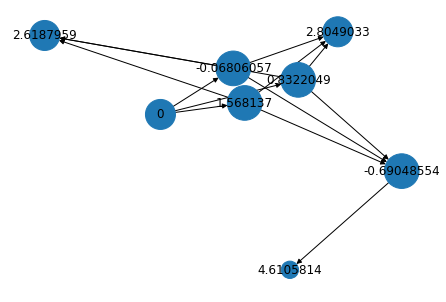

In [141]:
# rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
# colors = [['lightgrey', 'lightblue'][node.startswith('job')] 
#           for node in G.nodes()]
d = dict(G.degree)
nx.draw(G, pos, 
        with_labels=True, 
        # nodelist=d, 
        node_size=[d[k]*300 for k in d])

ERROR: Could not find an activated virtualenv (required).
